#A simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.




### Imported Some <b>Packages</b> 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

### Loading The Dataset

In [ ]:
import numpy as np
import h5py
    
def load_dataset():
    with h5py.File('Datasets/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('Datasets/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print(train_set_x_orig)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Just Example of a Picture

y = 1, its a catPicture


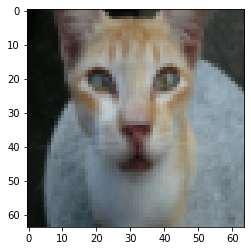

In [ ]:
index=11
plt.imshow(train_set_x_orig[index])
print("y = "+ str(train_set_y[0,index]) + ", its a " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8")+ "Picture") 

## Find the values for Training & Testing example

In [ ]:
### Here we know :
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### 

print("Number of Training example : m_tain =" + str(m_train))
print("Number of Testing example : m_test =" + str(m_test))
print("Height/Width of each image : num_px =" + str(num_px))
print("each image of the size :(" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape:" + str(train_set_x_orig.shape))
print("train_set_y shape:" + str(train_set_y.shape))
print("test_set_x shape:" + str(test_set_x_orig.shape))
print("test_set_y shape:" + str(test_set_y.shape))

Number of Training example : m_tain =209
Number of Testing example : m_test =50
Height/Width of each image : num_px =64
each image of the size :(64, 64, 3)
train_set_x shape:(209, 64, 64, 3)
train_set_y shape:(1, 209)
test_set_x shape:(50, 64, 64, 3)
test_set_y shape:(1, 50)


## Reshape the training and test data sets 

In [ ]:
# Here we know reshape:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])
#
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


### Standardize our dataset.

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


### When we are pre-processing a new dataset. We can follow some common steps

1)figure out the dimensions and shapes of the problem<br>

2) Reshape the dataset

3)Standardize the dataset


##4 - Building the parts of our algorithm

####4.1 - Helper functions

In [ ]:
def sigmoid(z):

  s= 1 /(1+np.exp(-z))
  
  return s

In [ ]:
print("sigmoid[0,2] :" +" "+ str(sigmoid(np.array([0,2]))))

sigmoid[0,2] : [0.5        0.88079708]


###4.2 - Initializing parameters

In [ ]:
def initialize_with_zeros(dim):

  w= np.zeros((dim,1))
  b=0

  assert(w.shape == (dim, 1))
  assert(isinstance(b, float) or isinstance(b, int))
    
  return w, b

In [ ]:
dim = 4
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]
 [0.]]
b = 0


##4.3 - Forward and Backward propagation Steps for the learning parameters


> Propagate function computes the cost and Gradients








In [ ]:
def propagation(w, b, X, Y):
    
    
    m = X.shape[1]
    
    # Forward Propagation
   
    A = sigmoid(np.dot(w.T,X) + b)  

    #Now we compute cost            
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  

    #Backward propagation
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m


    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

  

In [ ]:
w,b,X,Y =  np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])

grads, cost = propagation(w,b,X,Y)

print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))


dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


##4.4 - Optimization

> Update the parameters using gradient descent.The goal is to learn w and b by minimizing the cost function J.





In [ ]:
def optimize(w,b,X,Y,num_iterations, learning_rate, print_cost = False):

   costs = []
   
   for i in range(num_iterations):
     grads, cost = propagation(w, b, X, Y)

# Retrieve derivatives from grads
     dw=grads["dw"]
     db = grads["db"]

#update the parameter
     w= w-(learning_rate*dw)
     b= b-(learning_rate*db)

     if i% 100 ==0:
       costs.append(cost)

 # Print the cost every 100 training iterations
     if print_cost and i%100 == 0:
          print ("Cost after iteration %i: %f" %(i, cost))
   params ={"w": w,
            "b":b}
   grads = {"dw":dw,
            "db":db}
   return params,grads,costs



In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


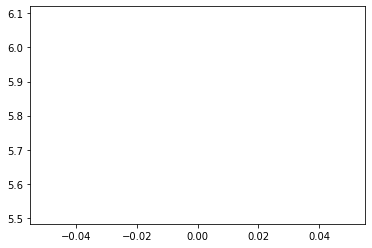

In [ ]:
plt.plot(costs)

## Predict Function:

In [ ]:
def predict(w,b,X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w= w.reshape(X.shape[0],1)

# Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X) + b)



    #### WORKING SOLUTION 1: USING IF ELSE #### 
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        #if (A[0,i] >= 0.5):
        #    Y_prediction[0, i] = 1
        #else:
        #    Y_prediction[0, i] = 0

        
    #### WORKING SOLUTION 2: ONE LINE ####
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        #Y_prediction[0, i] = 1 if A[0,i] >=0.5 else 0
    Y_prediction = (A>=0.5)*1.0
    assert(Y_prediction.shape ==(1,m))
    return Y_prediction
     



    

In [ ]:
w = np.array([[0.1124579], [0.23106775]])
b= -0.3
X= np.array([[1.,-1.,-3.2],[1.2,2.,0.1]])
print("prediction = " + str(predict(w,b,X)))

prediction = [[1. 1. 0.]]


##5 - Merge all functions into a model

In [ ]:
def model(X_train, Y_train, X_test,Y_test,num_iterations=100,learning_rate=0.5,print_cost=False):


    ##initialize parameter with zeros
    w,b = initialize_with_zeros(X_train.shape[0])
    parameters,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)

    #Retrieve the parameters w & b

    #prediction the test/train
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
  # test/train ERROSRS
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
          "Y_prediction_test": Y_prediction_test,
          "Y_prediction_train":Y_prediction_train,
          "w":w,
          "b":b,
          "learning_rate": learning_rate,
          "num_iterations": num_iterations}
      
    return d


In [196]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

train accuracy: 34.44976076555024 %
test accuracy: 66.0 %


In [ ]:
# Example of a picture that was wrongly classified.
index = 25
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

###Plot the cost function and the gradients.

In [ ]:
# Plot learning curv with costs

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))

##Choice of learning rate



> **Different learning rates give different costs and thus different predictions results**

1.   If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).

2.  A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
3. In deep learning, we usually recommend that choose the learning rate that better minimizes the cost function








In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for i in learning_rates:
    print ("learning rate is :" + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x,test_set_y, num_iterations=1500, learning_rate = i, print_cost=False)
    print('\n' + "-----------------------------------------------"+ '\n')



for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]))


plt.ylabel('cost')
plt.xlabel('iterations(hundreds)')



legend = plt.legend(loc= 'upper center', shadow= True)
fram = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<h1> 